CÂU 16

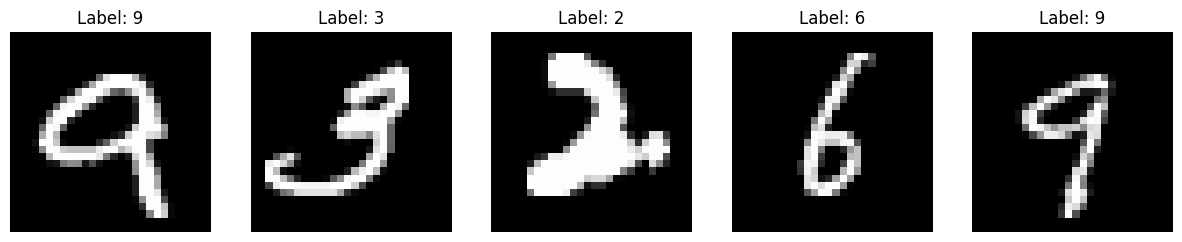

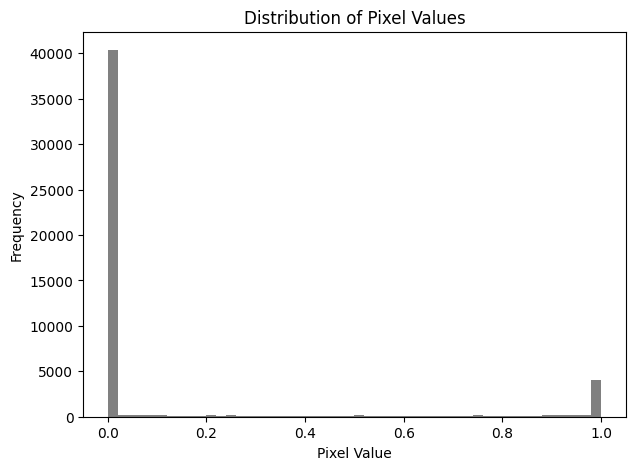

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Tải dữ liệu MNIST và chuẩn hóa
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Lấy 5 ảnh mẫu và nhãn
dataiter = iter(trainloader)
images, labels = next(dataiter) # Use next(dataiter) instead of dataiter.next()

# Chuyển các giá trị pixel về [0, 1]
images = images / 2 + 0.5  # Đảo ngược chuẩn hóa

# Vẽ 5 ảnh mẫu và nhãn
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(images[i].numpy().squeeze(), cmap="gray")
    axes[i].set_title(f'Label: {labels[i].item()}')
    axes[i].axis('off')

plt.show()

# Đề xuất cách trực quan hóa dữ liệu khác: Biểu đồ phân phối các giá trị pixel
pixels = images.numpy().reshape(-1, 784)  # Chuyển thành vector 784 chiều
pixels = pixels.flatten()

# Vẽ histogram của giá trị pixel
plt.figure(figsize=(7, 5))
plt.hist(pixels, bins=50, color='gray')
plt.title("Distribution of Pixel Values")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

Giải thích:
Chuẩn hóa: Dữ liệu MNIST được chuẩn hóa với giá trị pixel trong khoảng [-1, 1]. Sau khi tải dữ liệu, tôi đã áp dụng phép biến đổi ngược để đưa giá trị pixel về khoảng [0, 1].

Vẽ 5 ảnh mẫu: Sau khi tải batch dữ liệu, tôi sử dụng matplotlib để hiển thị 5 ảnh mẫu kèm theo nhãn của chúng.

Trực quan hóa khác: Một cách khác để trực quan hóa là vẽ histogram của các giá trị pixel, giúp bạn hiểu rõ hơn phân phối giá trị pixel trong dữ liệu MNIST.

Đề xuất cách trực quan hóa khác:
Heatmap: Biểu đồ nhiệt (heatmap) có thể giúp bạn hiểu rõ hơn về cách các giá trị pixel phân bố trong từng khu vực của ảnh. Bạn có thể áp dụng seaborn.heatmap hoặc matplotlib.imshow() để tạo một heatmap cho từng ảnh.

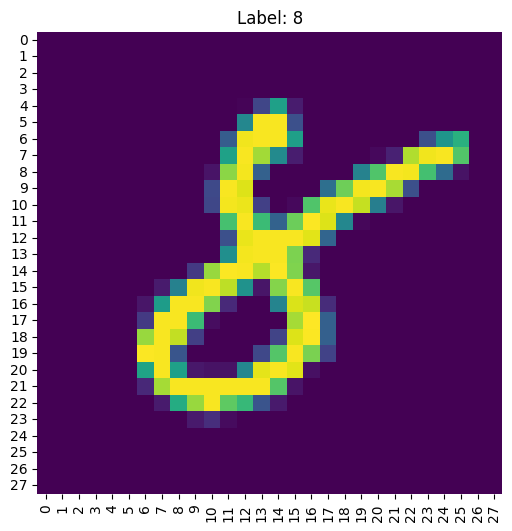

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Tải dữ liệu MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

# Lấy 1 batch ảnh mẫu
dataiter = iter(trainloader)
images, labels = next(dataiter) # Use next(dataiter) instead of dataiter.next()

# Chọn ảnh đầu tiên trong batch
image = images[0].numpy().squeeze()

# Vẽ Heatmap cho ảnh
plt.figure(figsize=(6,6))
sns.heatmap(image, cmap='viridis', cbar=False)
plt.title(f"Label: {labels[0].item()}")
plt.show()

Giải thích Heatmap:
Cách hoạt động: Mỗi hình ảnh trong bộ dữ liệu MNIST có kích thước 28x28 pixels. Sau khi chuẩn hóa, mỗi pixel có giá trị từ 0 (đen) đến 1 (trắng). Heatmap này sẽ cho bạn thấy hình ảnh của chữ số dưới dạng một bản đồ màu, giúp bạn hiểu rõ hơn về các vùng quan trọng trong mỗi chữ số.

Ý nghĩa: Ví dụ, đối với chữ số '1', bạn có thể thấy các điểm ảnh có giá trị sáng sẽ xuất hiện dọc theo một đường thẳng dài, phản ánh hình dạng của chữ số. Chữ số '8' sẽ có một hình dạng khá phức tạp với các phần sáng ở trên và dưới, phản ánh vòng tròn ở trên và dưới của nó.

Lý do sử dụng Heatmap:
Hiểu rõ hơn đặc điểm hình ảnh: Heatmap sẽ giúp bạn trực quan hóa các phần quan trọng của hình ảnh mà không cần phải xem trực tiếp các pixels, giúp bạn hiểu được các mẫu có thể tồn tại trong bộ dữ liệu MNIST.

Cải thiện mô hình học sâu: Bằng cách hiểu rõ hơn các đặc điểm của hình ảnh, bạn có thể điều chỉnh mô hình học sâu của mình sao cho tốt hơn, đặc biệt là khi kết hợp với các kỹ thuật như attention.

Câu 17

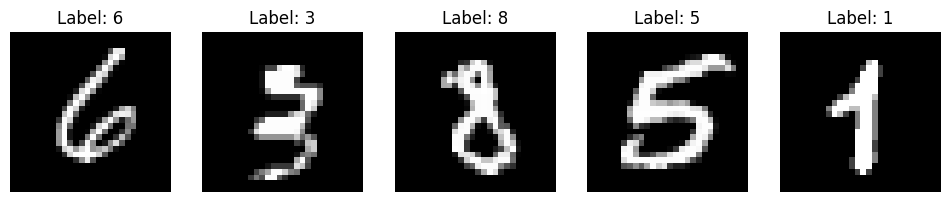

In [ ]:
import torch
from torch.utils.data import DataLoader, random_split
import torchvision.transforms as transforms
from torchvision.datasets import MNIST

# Tải bộ dữ liệu MNIST và chuẩn hóa các pixel về [0, 1]
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Tải dữ liệu MNIST
dataset = MNIST(root='./data', train=True, download=True, transform=transform)

# Chia tập dữ liệu thành 80% train và 20% validation
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Tạo DataLoader cho training và validation với batch size = 64
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)


# Kiểm tra 5 ảnh mẫu trong tập train
dataiter = iter(train_loader)
images, labels = next(dataiter)  # Use next(dataiter) instead of dataiter.next()

# In 5 ảnh mẫu và nhãn
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 5, figsize=(12, 6))
for i in range(5):
    ax = axes[i]
    ax.imshow(images[i].squeeze(), cmap='gray')
    ax.set_title(f"Label: {labels[i].item()}")
    ax.axis('off')

plt.show()


Đề xuất chiến lược chọn batch size:
Batch size nhỏ (32 hoặc 64):

Ưu điểm:

Tiết kiệm bộ nhớ: Đối với những máy tính có GPU hoặc bộ nhớ RAM hạn chế, việc chọn batch size nhỏ giúp hạn chế tiêu tốn tài nguyên.

Cập nhật thường xuyên: Sử dụng batch nhỏ cho phép cập nhật trọng số nhanh hơn, giúp mô hình học linh hoạt hơn.

Nhược điểm:

Thời gian huấn luyện lâu hơn: Dù cập nhật trọng số thường xuyên, nhưng tổng thời gian huấn luyện có thể dài hơn vì phải xử lý nhiều batch hơn.

Độ dao động cao trong quá trình huấn luyện: Đối với batch size nhỏ, giá trị của gradient có thể dao động mạnh, khiến quá trình tối ưu hóa ít ổn định.

Batch size lớn (128 hoặc 256):

Ưu điểm:

Học nhanh hơn: Được cập nhật trọng số ít lần hơn nhưng mỗi lần lại xử lý được nhiều dữ liệu, do đó tổng thời gian huấn luyện sẽ nhanh hơn.

Ổn định gradient: Sử dụng batch size lớn giúp giảm dao động trong gradient, khiến quá trình huấn luyện ổn định và ít nhảy vọt.

Nhược điểm:

Tốn bộ nhớ: Batch size lớn yêu cầu bộ nhớ tính toán lớn, có thể gây quá tải bộ nhớ, đặc biệt là với các GPU hoặc máy tính có dung lượng bộ nhớ thấp.

Khả năng chệch khỏi cực tiểu tối ưu: Việc sử dụng batch size lớn có thể khiến mô hình không khám phá được các điểm cực tiểu tối ưu trong không gian tham số vì nó có thể quá "làm trơn" quá trình tối ưu.

Giải pháp kết hợp:
Để tối ưu hóa hiệu suất, bạn có thể thử nghiệm với một chiến lược batch size "adaptive", tức là bắt đầu với một batch size lớn như 128, sau đó giảm dần theo thời gian (adaptive batch size). Điều này giúp mô hình học nhanh trong giai đoạn đầu, khi các tham số còn chưa ổn định, và sau đó tinh chỉnh các tham số một cách cẩn thận với batch size nhỏ hơn.

Câu 18

Epoch 1/20, Loss: 0.43541271262553966
Epoch 2/20, Loss: 0.1971176693350998
Epoch 3/20, Loss: 0.14408921434391123
Epoch 4/20, Loss: 0.1164929616455632
Epoch 5/20, Loss: 0.09827270129147464
Epoch 6/20, Loss: 0.08698494521889097
Epoch 7/20, Loss: 0.07673586721021707
Epoch 8/20, Loss: 0.07040396702042949
Epoch 9/20, Loss: 0.06383162986701613
Epoch 10/20, Loss: 0.05926240146120907
Epoch 11/20, Loss: 0.05420479699027295
Epoch 12/20, Loss: 0.050143511281527484
Epoch 13/20, Loss: 0.04614657423007108
Epoch 14/20, Loss: 0.0430529733415696
Epoch 15/20, Loss: 0.04036224753503923
Epoch 16/20, Loss: 0.03799692159405659
Epoch 17/20, Loss: 0.03678912514284104
Epoch 18/20, Loss: 0.03575115393084446
Epoch 19/20, Loss: 0.031207895210828323
Epoch 20/20, Loss: 0.03188607008204791


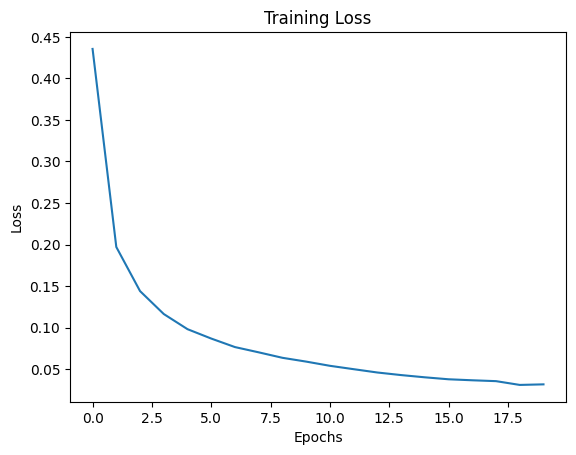

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Tải dữ liệu MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Định nghĩa kiến trúc ANN
class ANN_Model(nn.Module):
    def __init__(self):
        super(ANN_Model, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 10)

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten 28x28 images to 784
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Khởi tạo mô hình
model = ANN_Model()

# Loss function và optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Huấn luyện mô hình với early stopping
epochs = 20
patience = 5
best_loss = float('inf')
patience_counter = 0
train_loss = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(trainloader)
    train_loss.append(avg_loss)

    print(f'Epoch {epoch+1}/{epochs}, Loss: {avg_loss}')

    # Early stopping
    if avg_loss < best_loss:
        best_loss = avg_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered")
            break

# Vẽ biểu đồ loss
plt.plot(train_loss)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()



#Đề xuất cải tiến mô hình ANN
#1️⃣ Cải tiến số lượng nơ-ron trong các tầng ẩn
🔹 Vấn đề:

- Mô hình hiện tại có 3 tầng ẩn với 128, 64, 32 nơ-ron. Nếu số lượng nơ-ron quá lớn, mô hình có thể học thuộc dữ liệu huấn luyện (overfitting) và mất khả năng tổng quát hóa trên tập test.

- Nếu số lượng nơ-ron quá ít, mô hình có thể không đủ mạnh để học được các đặc trưng quan trọng, gây ra underfitting.

✅ Giải pháp đề xuất:

- Giảm số nơ-ron dần theo tầng: Chẳng hạn từ (128 → 64 → 32) thành (64 → 32 → 16) để tránh dư thừa.

- Thử nghiệm kiến trúc khác: Thay vì giảm dần, có thể thử cấu trúc 64 → 64 → 32 hoặc 128 → 32 → 32 để xem hiệu suất thay đổi thế nào.

- Thêm Batch Normalization: Ổn định quá trình huấn luyện và giúp mô hình hội tụ nhanh hơn.

📌 Lợi ích: Giúp mô hình tránh overfitting, giảm thời gian huấn luyện nhưng vẫn giữ được độ chính xác cao.

#2️⃣ Thêm Dropout để chống overfitting
🔹 Vấn đề:

Khi số lượng tham số quá lớn, mô hình dễ ghi nhớ dữ liệu huấn luyện thay vì học các quy luật tổng quát.

✅ Giải pháp đề xuất:

- Thêm lớp Dropout (0.2 - 0.5) sau mỗi tầng ẩn để giảm sự phụ thuộc quá mức vào một số nơ-ron nhất định.

- Thử nghiệm với các giá trị khác nhau: Dropout quá cao (ví dụ 0.5) có thể làm mất thông tin quan trọng, trong khi quá thấp (0.1) có thể không đủ hiệu quả.

📌 Lợi ích: Giúp mô hình tổng quát hóa tốt hơn, giảm overfitting và tăng độ chính xác trên tập test.

#3️⃣ Thử nghiệm với các phương pháp tối ưu hóa khác
🔹 Vấn đề:

Optimizer Adam thường hoạt động tốt trong nhiều bài toán, nhưng đôi khi có thể không phải là lựa chọn tốt nhất, đặc biệt với dữ liệu đơn giản như MNIST.

✅ Giải pháp đề xuất:

- SGD với Momentum: Giúp giảm độ dao động trong quá trình cập nhật trọng số và có thể giúp mô hình hội tụ tốt hơn.

- AdamW: Giống Adam nhưng có thêm trọng số điều chỉnh, giúp tránh overfitting tốt hơn.

- Learning Rate Scheduler: Giảm dần tốc độ học theo epochs để tối ưu quá trình huấn luyện.

📌 Lợi ích: Thử nghiệm với nhiều optimizer khác nhau giúp tìm ra phương pháp tối ưu nhất cho mô hình.

4️⃣ Cải thiện dữ liệu đầu vào
🔹 Vấn đề:

MNIST là dữ liệu hình ảnh chữ số viết tay, có thể có nhiễu, chữ số mờ, hoặc các nét bị lệch.

Việc chuẩn hóa và tiền xử lý chưa đủ tốt có thể ảnh hưởng đến hiệu suất mô hình.

✅ Giải pháp đề xuất:

- Tăng cường dữ liệu (Data Augmentation): Dùng rotation, shifting, zooming, hoặc adding noise để làm dữ liệu đa dạng hơn.

- Chuyển đổi ảnh sang PCA hoặc Autoencoder trước khi đưa vào mạng để giảm chiều dữ liệu và loại bỏ nhiễu không cần thiết.

📌 Lợi ích: Giúp mô hình học được các đặc trưng quan trọng hơn, tăng độ chính xác và giảm overfitting.

🎯 Kết luận
- Cải tiến	Giải thích	Lợi ích
- Giảm số lượng nơ-ron	Tránh dư thừa, giảm overfitting	Giúp mô hình nhẹ hơn, nhanh hơn
- Thêm Dropout	Ngăn nơ-ron phụ thuộc vào nhau quá mức	Tăng khả năng tổng quát
- Thử nghiệm optimizer khác	Adam không phải lúc nào cũng tối ưu	Cải thiện tốc độ hội tụ
- Tăng cường dữ liệu	Giúp mô hình học tốt hơn với nhiều dạng chữ số	Giảm lỗi do nhiễu, tăng độ chính xác
#🚀 Các cải tiến trên sẽ giúp mô hình ANN hoạt động hiệu quả hơn, tránh overfitting và cải thiện khả năng phân loại chữ số viết tay của MNIST.

Accuracy on test set: 97.78%


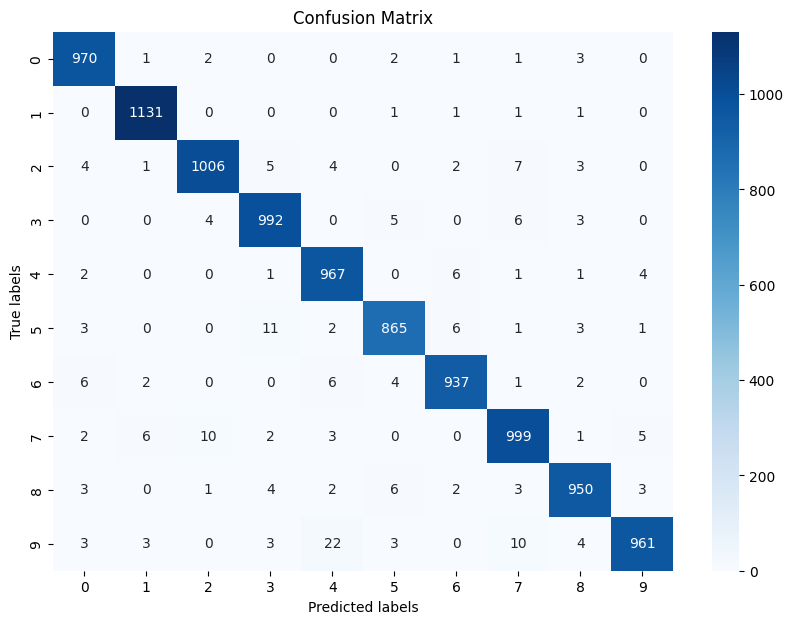

In [ ]:
import torch
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms


# Define the test dataset and dataloader
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Dự đoán trên tập kiểm tra
model.eval()  # Đặt mô hình ở chế độ đánh giá
correct = 0
total = 0
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in testloader:  # testloader là DataLoader của tập kiểm tra
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.extend(labels.numpy())
        all_preds.extend(predicted.numpy())

accuracy = 100 * correct / total
print(f"Accuracy on test set: {accuracy}%")

# Tính confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Vẽ confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#Phân tích confusion matrix:

- Khi bạn nhìn vào confusion matrix, bạn sẽ thấy các số trên ma trận biểu thị số lần mô hình phân loại đúng hoặc sai đối với các cặp chữ số thực và dự đoán. Ví dụ:

- Nếu mô hình liên tục nhầm lẫn giữa các chữ số 3 và 8, đó có thể là dấu hiệu rằng mô hình không phân biệt tốt giữa chúng.

- Để cải thiện mô hình, bạn có thể đề xuất các kỹ thuật như data augmentation (xoay, co giãn ảnh) để cung cấp dữ liệu phong phú hơn cho những chữ số thường bị nhầm lẫn, hoặc thay đổi kiến trúc mô hình để giúp mô hình học được đặc điểm phức tạp hơn.

#Đề xuất cải thiện mô hình:

- Dựa trên các chữ số bị nhầm lẫn trong confusion matrix, bạn có thể đề xuất một số cải tiến như:

- Sử dụng dữ liệu bổ sung: Nếu có chữ số nào hay bị nhầm, bạn có thể tạo thêm các biến thể của chữ số đó (data augmentation), như xoay ảnh, thay đổi độ sáng tối để mô hình có thể học tốt hơn.

- Điều chỉnh kiến trúc mạng: Nếu các chữ số bị nhầm lẫn là một nhóm cụ thể (ví dụ, các chữ số có hình dáng tương tự như 1 và 7), bạn có thể thay đổi số lượng lớp hoặc số lượng nơ-ron trong từng lớp để mạng có thể học các đặc điểm tinh vi hơn.

- Sử dụng Dropout hoặc Batch Normalization: Điều này có thể giúp mô hình học các đặc điểm tổng quát hơn và giảm khả năng bị overfitting (quá khớp).

- Bằng cách sử dụng accuracy và confusion matrix, có thể hiểu rõ hơn về các vấn đề trong mô hình của mình và cải thiện hiệu suất bằng các biện pháp phù hợp.